This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

date:year-month-date of data

pollution: PM2.5 concentration

dew: Dew Point

temp: Temperature

press: Pressure

wnd_dir: Combined wind direction

wnd_spd: Cumulated wind speed

snow: Cumulated hours of snow

rain: Cumulated hours of rain



# **multivariate(dependence technique)**

In [ ]:
# Load Pakages Mathematical and DATA Operations
import numpy as np 
import pandas as pd 

# Load Pakages plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

# Load Pakages for Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Pakages Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load Pakages for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load Pakages for Evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
# Load Dataset
df=pd.read_csv('/content/LSTM-Multivariate_pollution.csv',parse_dates=['date'])#by using parse_dates convert the string dtype to date format

Exploratory Data Analysis

In [ ]:
# Displaying the First 5-Records of data
df.head(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
# Displaying the Last 5-Records of data
df.tail(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43799,2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [ ]:
#information about rows and columns
print(f' No. of Rows: {df.shape[0]} \n No. of Columns: {df.shape[1]}')

 No. of Rows: 43800 
 No. of Columns: 9


In [ ]:
# Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       43800 non-null  datetime64[ns]
 1   pollution  43800 non-null  float64       
 2   dew        43800 non-null  int64         
 3   temp       43800 non-null  float64       
 4   press      43800 non-null  float64       
 5   wnd_dir    43800 non-null  object        
 6   wnd_spd    43800 non-null  float64       
 7   snow       43800 non-null  int64         
 8   rain       43800 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
#set date as index
df.index=df['date']

In [ ]:
#drop the date column
df.drop('date',axis=1,inplace=True)

In [ ]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


Encoding

In [ ]:
#encoding to convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['wnd_dir']=enc.fit_transform(df['wnd_dir'])

In [ ]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


Visualization

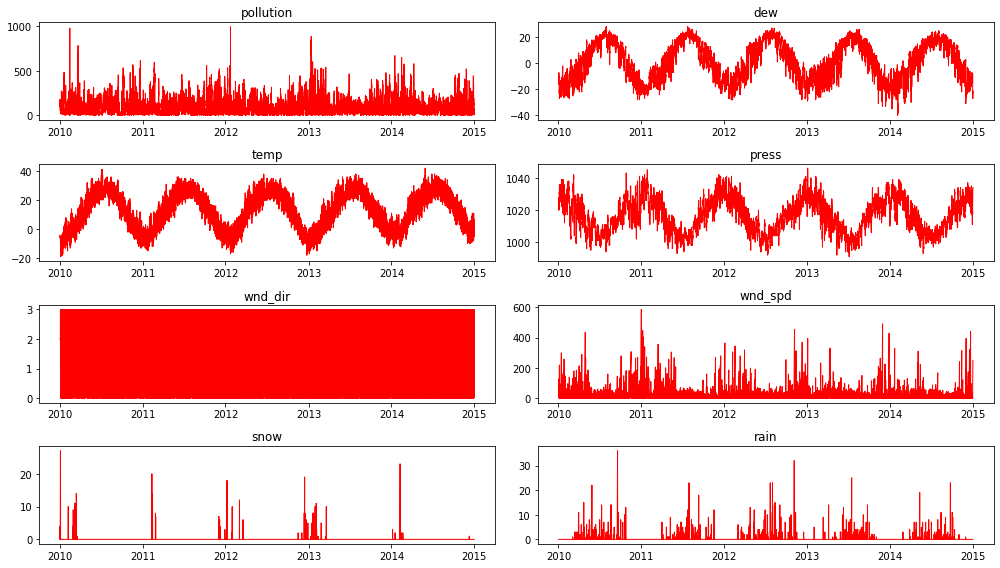

In [ ]:
#visualize all the features
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(14,8))
for i,ax in enumerate(axes.flatten()):
  data=df[df.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(df.columns[i])
  ax.tick_params(labelsize=10)

plt.tight_layout();

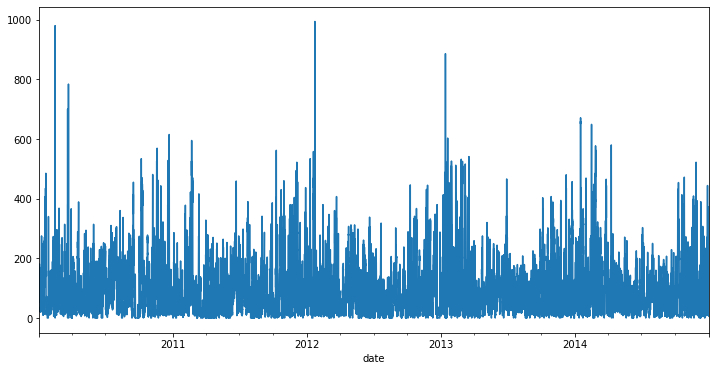

In [ ]:
#visualize the pollution feature
plt.figure(figsize=(12,6))
df['pollution'].plot();

Preprocessing

In [ ]:
#create dependent and independent variable with timestep
def df_to_X_y(df,window_size):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[a for a in df_as_np[i:i+window_size]]# add  first 24,2nd 24..... 
    X.append(row)
    label=df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X),np.array(y)

In [ ]:
#passing the data and split
X,y=df_to_X_y(df,window_size=24)

In [ ]:
#check the shape
X.shape,y.shape

((43776, 24, 8), (43776,))

In [ ]:
#split the data into training data,validation data,test data
x_train,y_train=X[:35020],y[:35020]
x_val,y_val=X[35020:39397],y[35020:39397]
x_test,y_test=X[39397:],y[39397:]
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((35020, 24, 8), (35020,), (4377, 24, 8), (4377,), (4379, 24, 8), (4379,))

In [ ]:
x_train.shape #input to be 3-dimensional :- (no.of samples, no.of timesteps, no.of features)

(35020, 24, 8)

In [ ]:
y_train.shape #output to be 2-dimensional :-(no.of samples,no.of features)

(35020,)

Scaling

In [ ]:
df_mean0=np.mean(x_train[:,:,0])#(35020,24,which variable we want use-->1st use 0 index,like for all)
df_std0=np.std(x_train[:,:,0])
df_mean1=np.mean(x_train[:,:,1])
df_std1=np.std(x_train[:,:,1])
df_mean2=np.mean(x_train[:,:,2])
df_std2=np.std(x_train[:,:,2])
df_mean3=np.mean(x_train[:,:,3])
df_std3=np.std(x_train[:,:,3])
df_mean4=np.mean(x_train[:,:,4])
df_std4=np.std(x_train[:,:,4])
df_mean5=np.mean(x_train[:,:,5])
df_std5=np.std(x_train[:,:,5])
df_mean6=np.mean(x_train[:,:,6])
df_std6=np.std(x_train[:,:,6])
df_mean7=np.mean(x_train[:,:,7])
df_std7=np.std(x_train[:,:,7])

In [ ]:
df_mean0,df_mean1

(93.35937202550923, 1.7812904530744336)

In [ ]:
df_std0,df_std1

(91.92248024271689, 14.493664369757937)

In [ ]:
#scaling x data by create def function 
def preprocessing(x):
  x[:,:,0]=(x[:,:,0]-df_mean0)/df_std0
  x[:,:,1]=(x[:,:,1]-df_mean1)/df_std1
  x[:,:,2]=(x[:,:,2]-df_mean2)/df_std2
  x[:,:,3]=(x[:,:,3]-df_mean3)/df_std3
  x[:,:,4]=(x[:,:,4]-df_mean4)/df_std4
  x[:,:,5]=(x[:,:,5]-df_mean5)/df_std5
  x[:,:,6]=(x[:,:,6]-df_mean6)/df_std6
  x[:,:,7]=(x[:,:,7]-df_mean7)/df_std7
  return x

In [ ]:
preprocessing(x_train)
preprocessing(x_val)
preprocessing(x_test)

array([[[ 2.46301317e-01,  1.18801630e+00,  1.53088072e+00, ...,
         -1.55129841e-01, -7.40337256e-02, -1.40905139e-01],
        [ 3.33331171e-01,  1.25701197e+00,  1.53088072e+00, ...,
         -7.67900536e-02, -7.40337256e-02, -1.40905139e-01],
        [ 3.11573708e-01,  1.32600763e+00,  1.53088072e+00, ...,
          1.54973417e-03, -7.40337256e-02, -1.40905139e-01],
        ...,
        [-6.56633414e-01,  1.32600763e+00,  8.80799586e-01, ...,
         -4.68878743e-01, -7.40337256e-02, -1.40905139e-01],
        [-4.71694975e-01,  1.32600763e+00,  9.62059728e-01, ...,
         -4.51339984e-01, -7.40337256e-02, -1.40905139e-01],
        [-4.06422585e-01,  1.32600763e+00,  9.62059728e-01, ...,
         -4.16457342e-01, -7.40337256e-02, -1.40905139e-01]],

       [[ 3.33331171e-01,  1.25701197e+00,  1.53088072e+00, ...,
         -7.67900536e-02, -7.40337256e-02, -1.40905139e-01],
        [ 3.11573708e-01,  1.32600763e+00,  1.53088072e+00, ...,
          1.54973417e-03, -7.40337256e

In [ ]:
#import libraries for model building
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError as mse
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

Model Building

In [ ]:
#model building
model=Sequential()
model.add(InputLayer((24,8)))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,activation='relu',return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))

In [ ]:
#summary of a model we build
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 150)           95400     
                                                                 
 dropout_2 (Dropout)         (None, 24, 150)           0         
                                                                 
 lstm_4 (LSTM)               (None, 24, 150)           180600    
                                                                 
 dropout_3 (Dropout)         (None, 24, 150)           0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 50)               

In [ ]:
#to stop epochs if there is no update 
earlystop=EarlyStopping(patience=5)

In [ ]:
#checkpoint to save the best model 
cp=ModelCheckpoint('model/',save_best_only=True)

In [ ]:
#compile the model
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [ ]:
#fit the model
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,batch_size=50,callbacks=[cp,earlystop])

Epoch 1/20
701/701 [==============================] - ETA: 0s - loss: 19581.7539 - root_mean_squared_error: 139.9348

701/701 [==============================] - 176s 244ms/step - loss: 19581.7539 - root_mean_squared_error: 139.9348 - val_loss: 5591.3286 - val_root_mean_squared_error: 74.7752
Epoch 2/20
701/701 [==============================] - ETA: 0s - loss: 4432.3638 - root_mean_squared_error: 66.5760

701/701 [==============================] - 174s 248ms/step - loss: 4432.3638 - root_mean_squared_error: 66.5760 - val_loss: 2343.3206 - val_root_mean_squared_error: 48.4079
Epoch 3/20
701/701 [==============================] - ETA: 0s - loss: 2355.5134 - root_mean_squared_error: 48.5336

701/701 [==============================] - 176s 251ms/step - loss: 2355.5134 - root_mean_squared_error: 48.5336 - val_loss: 1887.6556 - val_root_mean_squared_error: 43.4472
Epoch 4/20
701/701 [==============================] - ETA: 0s - loss: 1716.1479 - root_mean_squared_error: 41.4264

701/701 [==============================] - 178s 254ms/step - loss: 1716.1479 - root_mean_squared_error: 41.4264 - val_loss: 1018.5017 - val_root_mean_squared_error: 31.9140
Epoch 5/20
701/701 [==============================] - ETA: 0s - loss: 1368.6940 - root_mean_squared_error: 36.9959

701/701 [==============================] - 175s 249ms/step - loss: 1368.6940 - root_mean_squared_error: 36.9959 - val_loss: 1018.2617 - val_root_mean_squared_error: 31.9102
Epoch 6/20
701/701 [==============================] - 177s 253ms/step - loss: 1242.4069 - root_mean_squared_error: 35.2478 - val_loss: 1076.7491 - val_root_mean_squared_error: 32.8139
Epoch 7/20
701/701 [==============================] - ETA: 0s - loss: 1129.9236 - root_mean_squared_error: 33.6143

701/701 [==============================] - 182s 259ms/step - loss: 1129.9236 - root_mean_squared_error: 33.6143 - val_loss: 838.4885 - val_root_mean_squared_error: 28.9567
Epoch 8/20
701/701 [==============================] - 163s 233ms/step - loss: 1111.2075 - root_mean_squared_error: 33.3348 - val_loss: 1205.5889 - val_root_mean_squared_error: 34.7216
Epoch 9/20
701/701 [==============================] - ETA: 0s - loss: 1040.4833 - root_mean_squared_error: 32.2565

701/701 [==============================] - 173s 247ms/step - loss: 1040.4833 - root_mean_squared_error: 32.2565 - val_loss: 704.7974 - val_root_mean_squared_error: 26.5480
Epoch 10/20
701/701 [==============================] - ETA: 0s - loss: 960.9329 - root_mean_squared_error: 30.9989

701/701 [==============================] - 180s 256ms/step - loss: 960.9329 - root_mean_squared_error: 30.9989 - val_loss: 701.0814 - val_root_mean_squared_error: 26.4779
Epoch 11/20
701/701 [==============================] - ETA: 0s - loss: 928.9554 - root_mean_squared_error: 30.4788

701/701 [==============================] - 179s 255ms/step - loss: 928.9554 - root_mean_squared_error: 30.4788 - val_loss: 670.8447 - val_root_mean_squared_error: 25.9007
Epoch 12/20
701/701 [==============================] - 162s 232ms/step - loss: 889.4305 - root_mean_squared_error: 29.8233 - val_loss: 682.4418 - val_root_mean_squared_error: 26.1236
Epoch 13/20
701/701 [==============================] - 169s 242ms/step - loss: 879.7571 - root_mean_squared_error: 29.6607 - val_loss: 704.5802 - val_root_mean_squared_error: 26.5439
Epoch 14/20
701/701 [==============================] - 161s 230ms/step - loss: 855.1357 - root_mean_squared_error: 29.2427 - val_loss: 772.6198 - val_root_mean_squared_error: 27.7960
Epoch 15/20
701/701 [==============================] - 168s 239ms/step - loss: 827.9730 - root_mean_squared_error: 28.7745 - val_loss: 697.1817 - val_root_mean_squared_error: 26.4042
Epoch 16/20
701/701 [==============================] - ETA: 0s - loss: 814.9676 - root_mean_squar

701/701 [==============================] - 168s 240ms/step - loss: 814.9676 - root_mean_squared_error: 28.5476 - val_loss: 641.9611 - val_root_mean_squared_error: 25.3369
Epoch 17/20
701/701 [==============================] - 174s 248ms/step - loss: 825.1228 - root_mean_squared_error: 28.7250 - val_loss: 681.4038 - val_root_mean_squared_error: 26.1037
Epoch 18/20
701/701 [==============================] - ETA: 0s - loss: 805.6083 - root_mean_squared_error: 28.3832

701/701 [==============================] - 182s 260ms/step - loss: 805.6083 - root_mean_squared_error: 28.3832 - val_loss: 631.6897 - val_root_mean_squared_error: 25.1334
Epoch 19/20
701/701 [==============================] - 169s 241ms/step - loss: 812.1833 - root_mean_squared_error: 28.4988 - val_loss: 732.6679 - val_root_mean_squared_error: 27.0678
Epoch 20/20
701/701 [==============================] - 171s 244ms/step - loss: 842.4731 - root_mean_squared_error: 29.0254 - val_loss: 687.9677 - val_root_mean_squared_error: 26.2291


In [ ]:
#load the best save model for prediction 
model=load_model('model/')

Evaluation

In [ ]:
#evaluate the validation set
val_pred=model.predict(x_val).flatten()

137/137 [==============================] - 10s 67ms/step


In [ ]:
#create  dataframe for evaluation of validation set
val_results=pd.DataFrame(data={'actual':y_val,'prediction':val_pred})
val_results

,actual,prediction
0,79.0,57.013271
1,92.0,78.322510
2,106.0,85.198212
3,75.0,92.176102
4,58.0,64.896027
...,...,...
4372,57.0,56.958569
4373,52.0,57.009224
4374,33.0,52.577549
4375,50.0,45.639889


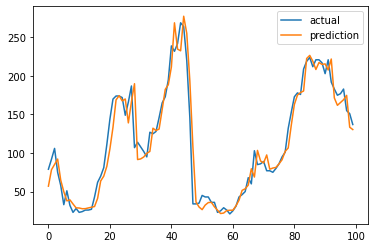

In [ ]:
#plot the validation result
plt.plot(val_results['actual'][:100])
plt.plot(val_results['prediction'][:100])
plt.legend(['actual','prediction']);

Evaluation on test set

In [ ]:
#def function for prediction and plotting
def plot_prediction(model,X,y,start,end):
  pred=model.predict(X)
  pred_poll=model.predict(X).flatten()
  act_poll=y
  results=pd.DataFrame(data={'actual':act_poll,'prediction':pred_poll})
  return results

In [ ]:
#forecast prediction
post_processed_df=plot_prediction(model,x_test,y_test,0,4378)
post_processed_df

137/137 [==============================] - 9s 64ms/step


,actual,prediction
0,64.0,57.684837
1,66.0,67.176071
2,72.0,71.467514
3,78.0,76.061958
4,78.0,82.031509
...,...,...
4374,8.0,15.003546
4375,10.0,14.890377
4376,10.0,14.750581
4377,8.0,14.449902


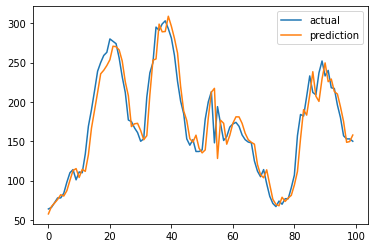

In [ ]:
#plot for first 100 records in test 
plt.plot(post_processed_df['actual'][:100])
plt.plot(post_processed_df['prediction'][:100])
plt.legend(['actual','prediction']);

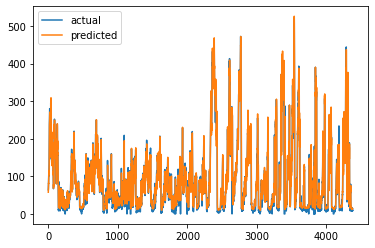

In [ ]:
#plot all records on test data
plt.plot(post_processed_df['actual'])
plt.plot(post_processed_df['prediction'])
plt.legend(['actual','predicted']);

In [ ]:
#save the forecasted values 
post_processed_df['prediction'].to_csv('forecasted_values')

In [ ]:
#predicting whole dataset
whole_data=plot_prediction(model,X,y,0,43776)
whole_data

1368/1368 [==============================] - 88s 64ms/step


,actual,prediction
0,90.0,114.513664
1,63.0,78.860031
2,65.0,57.003864
3,55.0,62.561462
4,65.0,61.923595
...,...,...
43771,8.0,15.003546
43772,10.0,14.890377
43773,10.0,14.750578
43774,8.0,14.449903


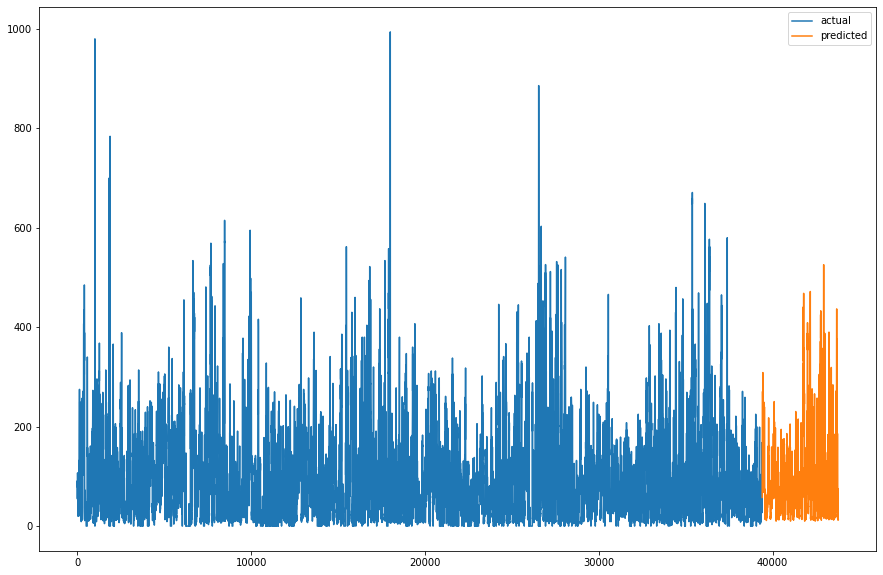

In [ ]:
#plotting actual vs forecasting values
plt.figure(figsize=(15,10))
plt.plot(whole_data['actual'][:39397])
plt.plot(whole_data['prediction'][39397:])
plt.legend(['actual','predicted']);

# **multivariate-parallel series(interdependence technique)**

In [96]:
# Load Pakages Mathematical and DATA Operations
import numpy as np 
import pandas as pd 

# Load Pakages plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

# Load Pakages for Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Pakages Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load Pakages for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load Pakages for Evaluation
from sklearn.metrics import mean_squared_error

In [97]:
# Load Dataset
df=pd.read_csv('/content/LSTM-Multivariate_pollution.csv',parse_dates=['date'])#by using parse_dates convert the string dtype to date format

eda

In [98]:
# Displaying the First 5-Records of data
df.head(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [99]:
# Displaying the Last 5-Records of data
df.tail(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43799,2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [100]:
#information about rows and columns
print(f' No. of Rows: {df.shape[0]} \n No. of Columns: {df.shape[1]}')

 No. of Rows: 43800 
 No. of Columns: 9


In [101]:
# Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       43800 non-null  datetime64[ns]
 1   pollution  43800 non-null  float64       
 2   dew        43800 non-null  int64         
 3   temp       43800 non-null  float64       
 4   press      43800 non-null  float64       
 5   wnd_dir    43800 non-null  object        
 6   wnd_spd    43800 non-null  float64       
 7   snow       43800 non-null  int64         
 8   rain       43800 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [102]:
#set date as index
df.index=df['date']

In [103]:
#drop the date column
df.drop('date',axis=1,inplace=True)

In [104]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


encoding

In [105]:
#encoding to convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['wnd_dir']=enc.fit_transform(df['wnd_dir'])

In [106]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


visualization

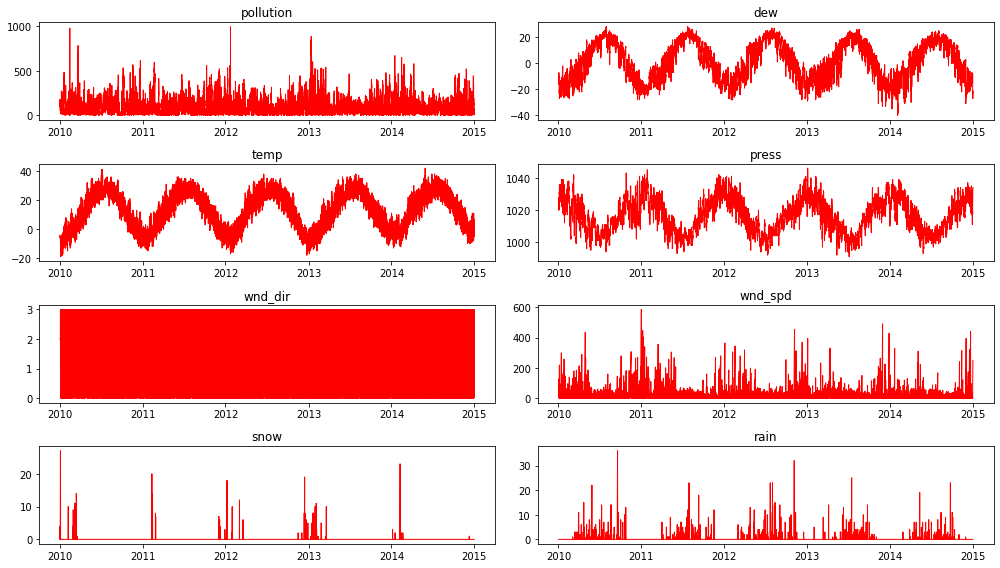

In [107]:
#visualize all features
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(14,8))
for i,ax in enumerate(axes.flatten()):
  data=df[df.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(df.columns[i])
  ax.tick_params(labelsize=10)

plt.tight_layout();

preprocessing

In [109]:
#create dependent and independent variable with timestep
def df_to_X_y(df,window_size):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[a for a in df_as_np[i:i+window_size]]# add  first 24,2nd 24..... 
    X.append(row)
    label=df_as_np[i+window_size]
    y.append(label)
  return np.array(X),np.array(y)

In [110]:
#passing the data and split
X,y=df_to_X_y(df,window_size=24)

In [111]:
#check the shape
X.shape,y.shape

((43776, 24, 8), (43776, 8))

In [112]:
#split the data into training data,validation data,test data
x_train,y_train=X[:35020],y[:35020]
x_val,y_val=X[35020:39397],y[35020:39397]
x_test,y_test=X[39397:],y[39397:]
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((35020, 24, 8),
 (35020, 8),
 (4377, 24, 8),
 (4377, 8),
 (4379, 24, 8),
 (4379, 8))

In [113]:
x_train.shape #input to be 3-dimensional :- (no.of samples, no.of timesteps, no.of features)

(35020, 24, 8)

In [114]:
y_train.shape #output to be 2-dimensional :-(no.of samples,no.of features)

(35020, 8)

scaling

In [115]:
df_mean0=np.mean(x_train[:,:,0])#(32832all,24all,which variable we want use-->1st use 0 index,for all :)
df_std0=np.std(x_train[:,:,0])
df_mean1=np.mean(x_train[:,:,1])
df_std1=np.std(x_train[:,:,1])
df_mean2=np.mean(x_train[:,:,2])
df_std2=np.std(x_train[:,:,2])
df_mean3=np.mean(x_train[:,:,3])
df_std3=np.std(x_train[:,:,3])
df_mean4=np.mean(x_train[:,:,4])
df_std4=np.std(x_train[:,:,4])
df_mean5=np.mean(x_train[:,:,5])
df_std5=np.std(x_train[:,:,5])
df_mean6=np.mean(x_train[:,:,6])
df_std6=np.std(x_train[:,:,6])
df_mean7=np.mean(x_train[:,:,7])
df_std7=np.std(x_train[:,:,7])

In [116]:
df_mean0,df_mean1

(93.35937202550923, 1.7812904530744336)

In [117]:
df_std0,df_std1

(91.92248024271689, 14.493664369757937)

In [118]:
#scaling x data by create def function 
def preprocessing(x):
  x[:,:,0]=(x[:,:,0]-df_mean0)/df_std0
  x[:,:,1]=(x[:,:,1]-df_mean1)/df_std1
  x[:,:,2]=(x[:,:,2]-df_mean2)/df_std2
  x[:,:,3]=(x[:,:,3]-df_mean3)/df_std3
  x[:,:,4]=(x[:,:,4]-df_mean4)/df_std4
  x[:,:,5]=(x[:,:,5]-df_mean5)/df_std5
  x[:,:,6]=(x[:,:,6]-df_mean6)/df_std6
  x[:,:,7]=(x[:,:,7]-df_mean7)/df_std7
  return x

In [119]:
preprocessing(x_train)
preprocessing(x_val)
preprocessing(x_test)

array([[[ 2.46301317e-01,  1.18801630e+00,  1.53088072e+00, ...,
         -1.55129841e-01, -7.40337256e-02, -1.40905139e-01],
        [ 3.33331171e-01,  1.25701197e+00,  1.53088072e+00, ...,
         -7.67900536e-02, -7.40337256e-02, -1.40905139e-01],
        [ 3.11573708e-01,  1.32600763e+00,  1.53088072e+00, ...,
          1.54973417e-03, -7.40337256e-02, -1.40905139e-01],
        ...,
        [-6.56633414e-01,  1.32600763e+00,  8.80799586e-01, ...,
         -4.68878743e-01, -7.40337256e-02, -1.40905139e-01],
        [-4.71694975e-01,  1.32600763e+00,  9.62059728e-01, ...,
         -4.51339984e-01, -7.40337256e-02, -1.40905139e-01],
        [-4.06422585e-01,  1.32600763e+00,  9.62059728e-01, ...,
         -4.16457342e-01, -7.40337256e-02, -1.40905139e-01]],

       [[ 3.33331171e-01,  1.25701197e+00,  1.53088072e+00, ...,
         -7.67900536e-02, -7.40337256e-02, -1.40905139e-01],
        [ 3.11573708e-01,  1.32600763e+00,  1.53088072e+00, ...,
          1.54973417e-03, -7.40337256e

In [120]:
#scaling y data by create def function 
def preprocessing(y):
  y[:,0]=(y[:,0]-df_mean0)/df_std0
  y[:,1]=(y[:,1]-df_mean1)/df_std1
  y[:,2]=(y[:,2]-df_mean2)/df_std2
  y[:,3]=(y[:,3]-df_mean3)/df_std3
  y[:,4]=(y[:,4]-df_mean4)/df_std4
  y[:,5]=(y[:,5]-df_mean5)/df_std5
  y[:,6]=(y[:,6]-df_mean6)/df_std6
  y[:,7]=(y[:,7]-df_mean7)/df_std7
  return y

In [121]:
preprocessing(y_train)
preprocessing(y_val)
preprocessing(y_test)

array([[-0.31939273,  1.32600763,  1.04331987, ..., -0.46887874,
        -0.07403373, -0.14090514],
       [-0.29763527,  1.32600763,  1.04331987, ..., -0.45153486,
        -0.07403373, -0.14090514],
       [-0.23236288,  1.32600763,  1.12458001, ..., -0.43419098,
        -0.07403373, -0.14090514],
       ...,
       [-0.90684424, -1.64080593, -1.2319641 , ...,  4.24339591,
        -0.07403373, -0.14090514],
       [-0.92860171, -1.64080593, -1.31322424, ...,  4.32173569,
        -0.07403373, -0.14090514],
       [-0.88508678, -1.57181027, -1.2319641 , ...,  4.3827316 ,
        -0.07403373, -0.14090514]])

In [122]:
#import libraries for model building
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError as mse
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

model building

In [123]:
#model building
model=Sequential()
model.add(InputLayer((24,8)))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,activation='relu',return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dense(8))

In [124]:
#summary of a model we build
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 150)           95400     
                                                                 
 dropout_2 (Dropout)         (None, 24, 150)           0         
                                                                 
 lstm_4 (LSTM)               (None, 24, 150)           180600    
                                                                 
 dropout_3 (Dropout)         (None, 24, 150)           0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 8)                

In [125]:
#to stop epochs if there is no update 
earlystop=EarlyStopping(patience=8)

In [126]:
#checkpoint to save the best model 
cp=ModelCheckpoint('model/',save_best_only=True)

In [127]:
#compile the model
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [128]:
#fit the model
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=25,batch_size=101,callbacks=[cp,earlystop])

Epoch 1/25
347/347 [==============================] - ETA: 0s - loss: 9.5731 - root_mean_squared_error: 3.0940

347/347 [==============================] - 118s 328ms/step - loss: 9.5731 - root_mean_squared_error: 3.0940 - val_loss: 0.4168 - val_root_mean_squared_error: 0.6456
Epoch 2/25
347/347 [==============================] - ETA: 0s - loss: 0.3994 - root_mean_squared_error: 0.6320

347/347 [==============================] - 115s 333ms/step - loss: 0.3994 - root_mean_squared_error: 0.6320 - val_loss: 0.3186 - val_root_mean_squared_error: 0.5645
Epoch 3/25
347/347 [==============================] - ETA: 0s - loss: 0.4776 - root_mean_squared_error: 0.6911

347/347 [==============================] - 114s 330ms/step - loss: 0.4776 - root_mean_squared_error: 0.6911 - val_loss: 0.2595 - val_root_mean_squared_error: 0.5094
Epoch 4/25
347/347 [==============================] - ETA: 0s - loss: 0.3013 - root_mean_squared_error: 0.5489

347/347 [==============================] - 114s 329ms/step - loss: 0.3013 - root_mean_squared_error: 0.5489 - val_loss: 0.2356 - val_root_mean_squared_error: 0.4854
Epoch 5/25
347/347 [==============================] - ETA: 0s - loss: 0.2793 - root_mean_squared_error: 0.5285

347/347 [==============================] - 119s 344ms/step - loss: 0.2793 - root_mean_squared_error: 0.5285 - val_loss: 0.2101 - val_root_mean_squared_error: 0.4584
Epoch 6/25
347/347 [==============================] - ETA: 0s - loss: 0.2542 - root_mean_squared_error: 0.5042

347/347 [==============================] - 113s 325ms/step - loss: 0.2542 - root_mean_squared_error: 0.5042 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4515
Epoch 7/25
347/347 [==============================] - 115s 330ms/step - loss: 0.2412 - root_mean_squared_error: 0.4911 - val_loss: 0.2365 - val_root_mean_squared_error: 0.4863
Epoch 8/25
347/347 [==============================] - ETA: 0s - loss: 0.2314 - root_mean_squared_error: 0.4810

347/347 [==============================] - 115s 331ms/step - loss: 0.2314 - root_mean_squared_error: 0.4810 - val_loss: 0.1848 - val_root_mean_squared_error: 0.4299
Epoch 9/25
347/347 [==============================] - ETA: 0s - loss: 0.2156 - root_mean_squared_error: 0.4643

347/347 [==============================] - 114s 329ms/step - loss: 0.2156 - root_mean_squared_error: 0.4643 - val_loss: 0.1781 - val_root_mean_squared_error: 0.4220
Epoch 10/25
347/347 [==============================] - 110s 316ms/step - loss: 0.2064 - root_mean_squared_error: 0.4543 - val_loss: 0.1905 - val_root_mean_squared_error: 0.4365
Epoch 11/25
347/347 [==============================] - ETA: 0s - loss: 0.2060 - root_mean_squared_error: 0.4538

347/347 [==============================] - 114s 329ms/step - loss: 0.2060 - root_mean_squared_error: 0.4538 - val_loss: 0.1711 - val_root_mean_squared_error: 0.4136
Epoch 12/25
347/347 [==============================] - ETA: 0s - loss: 0.2032 - root_mean_squared_error: 0.4507

347/347 [==============================] - 115s 331ms/step - loss: 0.2032 - root_mean_squared_error: 0.4507 - val_loss: 0.1669 - val_root_mean_squared_error: 0.4086
Epoch 13/25
347/347 [==============================] - 109s 316ms/step - loss: 0.1971 - root_mean_squared_error: 0.4440 - val_loss: 0.1726 - val_root_mean_squared_error: 0.4154
Epoch 14/25
347/347 [==============================] - 113s 324ms/step - loss: 0.1991 - root_mean_squared_error: 0.4463 - val_loss: 0.1771 - val_root_mean_squared_error: 0.4208
Epoch 15/25
347/347 [==============================] - 108s 312ms/step - loss: 0.1929 - root_mean_squared_error: 0.4392 - val_loss: 0.1797 - val_root_mean_squared_error: 0.4240
Epoch 16/25
347/347 [==============================] - 125s 360ms/step - loss: 0.1964 - root_mean_squared_error: 0.4432 - val_loss: 0.1732 - val_root_mean_squared_error: 0.4162
Epoch 17/25
347/347 [==============================] - ETA: 0s - loss: 0.1951 - root_mean_squared_error: 0.4417

347/347 [==============================] - 136s 393ms/step - loss: 0.1951 - root_mean_squared_error: 0.4417 - val_loss: 0.1641 - val_root_mean_squared_error: 0.4051
Epoch 18/25
347/347 [==============================] - 115s 330ms/step - loss: 0.1931 - root_mean_squared_error: 0.4395 - val_loss: 0.1693 - val_root_mean_squared_error: 0.4115
Epoch 19/25
347/347 [==============================] - 107s 307ms/step - loss: 0.1910 - root_mean_squared_error: 0.4370 - val_loss: 0.1709 - val_root_mean_squared_error: 0.4134
Epoch 20/25
347/347 [==============================] - 108s 311ms/step - loss: 0.1847 - root_mean_squared_error: 0.4297 - val_loss: 0.1685 - val_root_mean_squared_error: 0.4105
Epoch 21/25
347/347 [==============================] - 110s 318ms/step - loss: 0.1845 - root_mean_squared_error: 0.4296 - val_loss: 0.1669 - val_root_mean_squared_error: 0.4085
Epoch 22/25
347/347 [==============================] - 107s 307ms/step - loss: 0.1833 - root_mean_squared_error: 0.4281 - val_l

347/347 [==============================] - 119s 343ms/step - loss: 0.1844 - root_mean_squared_error: 0.4294 - val_loss: 0.1626 - val_root_mean_squared_error: 0.4032
Epoch 24/25
347/347 [==============================] - 125s 360ms/step - loss: 0.1876 - root_mean_squared_error: 0.4331 - val_loss: 0.3731 - val_root_mean_squared_error: 0.6108
Epoch 25/25
347/347 [==============================] - 112s 322ms/step - loss: 0.1919 - root_mean_squared_error: 0.4380 - val_loss: 0.1747 - val_root_mean_squared_error: 0.4180


In [129]:
#load the best save model for prediction 
model=load_model('model/')

evaluation

In [130]:
#evaluate the validation set
val_pred=model.predict(x_val)
x_val_poll,x_val_temp=val_pred[:,0],val_pred[:,2]
y_val_poll,y_val_temp=y_val[:,0],y_val[:,2]

137/137 [==============================] - 9s 59ms/step


In [131]:
#create  dataframe for evaluation of validation set
val_results=pd.DataFrame(data={'actual_poll':y_val_poll,'prediction_poll':x_val_poll,'actual_temp':y_val_temp,'prediction_temp':x_val_temp})
val_results

,actual_poll,prediction_poll,actual_temp,prediction_temp
0,-0.156212,-0.644183,-0.744403,-0.558598
1,-0.014788,-0.575722,-0.663143,-0.619671
2,0.137514,-0.273363,-0.500623,-0.575094
3,-0.199727,-0.205982,-0.500623,-0.517543
4,-0.384665,-0.464973,-0.500623,-0.423186
...,...,...,...,...
4372,-0.395544,-0.323316,0.799539,1.107581
4373,-0.449938,-0.341243,0.799539,1.040358
4374,-0.656633,-0.394786,0.880800,1.004469
4375,-0.471695,-0.434945,0.962060,1.137600


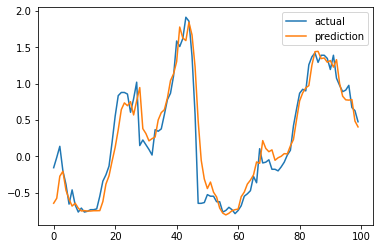

In [132]:
#visualize the validation result for pollution
plt.plot(val_results['actual_poll'][:100])
plt.plot(val_results['prediction_poll'][:100])
plt.legend(['actual','prediction']);

In [133]:
from sklearn.metrics import mean_squared_error as mse

In [134]:
rmse=np.sqrt(mse(x_val_poll,y_val_poll))
rmse

0.29135109453315733

In [135]:
#By rescaling convert the scaling value to actual value
def postprocessing_p(array):
  array=(array*df_std0)+df_mean0
  return array

Evaluation on test set

In [136]:
#def function for prediction and plotting
def plot_prediction(model,X,y,start,end):
  pred=model.predict(X)
  pred_poll,pred_temp=postprocessing_p(pred[:,0]),postprocessing_p(pred[:,2])
  act_poll,act_temp=postprocessing_p(y[:,0]),postprocessing_p(y[:,2])
  results=pd.DataFrame(data={'actual_poll':act_poll,'prediction_poll':pred_poll,'actual_temp':act_temp,'prediction_temp':pred_temp})
  return results

In [137]:
#forecast prediction
processed_df=plot_prediction(model,x_test,y_test,0,4379)
processed_df

137/137 [==============================] - 7s 47ms/step


,actual_poll,prediction_poll,actual_temp,prediction_temp
0,64.0,68.804214,189.263922,204.623718
1,66.0,76.710381,189.263922,207.181030
2,72.0,80.900902,196.733556,208.259430
3,78.0,85.207657,196.733556,211.314087
4,78.0,90.396828,196.733556,213.637817
...,...,...,...,...
4374,8.0,9.409500,-12.416190,4.933418
4375,10.0,8.749313,-19.885823,1.479248
4376,10.0,8.465935,-19.885823,-2.436981
4377,8.0,8.534340,-27.355457,-6.027206


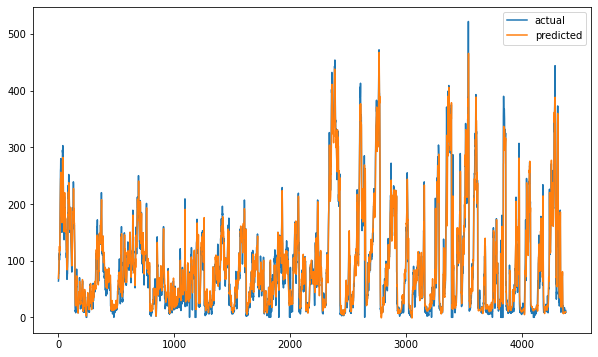

In [161]:
plt.figure(figsize=(10,6))
plt.plot(processed_df['actual_poll'])
plt.plot(processed_df['prediction_poll'])
plt.legend(['actual','predicted']);

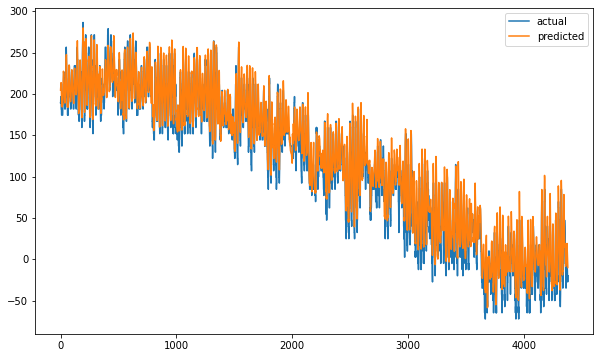

In [162]:
plt.figure(figsize=(10,6))
plt.plot(processed_df['actual_temp'])
plt.plot(processed_df['prediction_temp'])
plt.legend(['actual','predicted']);

In [140]:
#save the forecasted values 
processed_df.to_csv('forecasted_values')

In [156]:
def plot_prediction(model,X,y,start,end):
  pred=model.predict(X)
  pred_poll,pred_temp=postprocessing_p(pred[:,0]),postprocessing_p(pred[:,2])
  act_poll,act_temp=postprocessing_p(y[:,0]),postprocessing_p(y[:,2])
  results=pd.DataFrame(data={'actual_poll':act_poll,'prediction_poll':pred_poll,'actual_temp':act_temp,'prediction_temp':pred_temp})
  return results

In [157]:
#predicting whole dataset
whole_data=plot_prediction(model,X,y,0,43776)

1368/1368 [==============================] - 73s 53ms/step


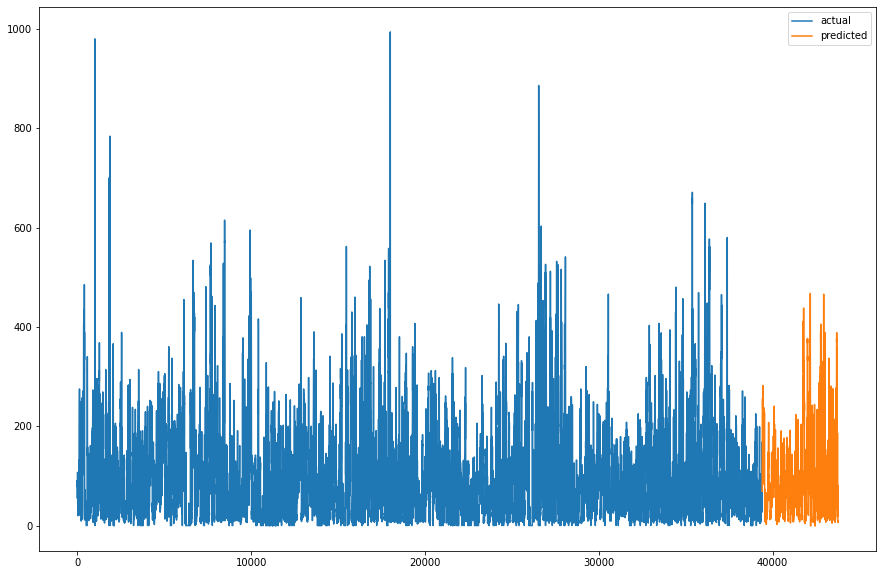

In [158]:
#plotting actual vs forecasting values
plt.figure(figsize=(15,10))
plt.plot(whole_data['actual_poll'][:39397])
plt.plot(whole_data['prediction_poll'][39397:])
plt.legend(['actual','predicted']);